In [2]:
from google.colab import files


In [12]:
uploaded=files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (1).csv


## Comparing Some Fundamental Regression Methods On Admission Prediction Data 

### There are lots of regression methods to predict data such as Linear Regression, Decision Tree Regression and so on .In this notebook ,we will try tp predict the "Chance of Admit" data by using someof fundamental regression methods ,which are Linear Regression ,Multiply Linear Regression Decision Tree Regression and Rondom Forest Regression  

## Importing the required libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [30]:
import io 
df=pd.read_csv(io.BytesIO(uploaded['Admission_Predict_Ver1.1.csv']))

In [33]:
file="Admission_Predict_Ver1.1.csv"
df=pd.read_csv(file)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Preparing the dataset

In [35]:
df=pd.read_csv(file)
df=df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Creating a correlation matrix

In [36]:
corr_matrix=df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


When looking at the data and correlation matrix, it seems that "Chance of Admit" values depend on lots of variables. To observe the effects of columns on "Chance of Admit" values in detail, so creating a correlation graph.

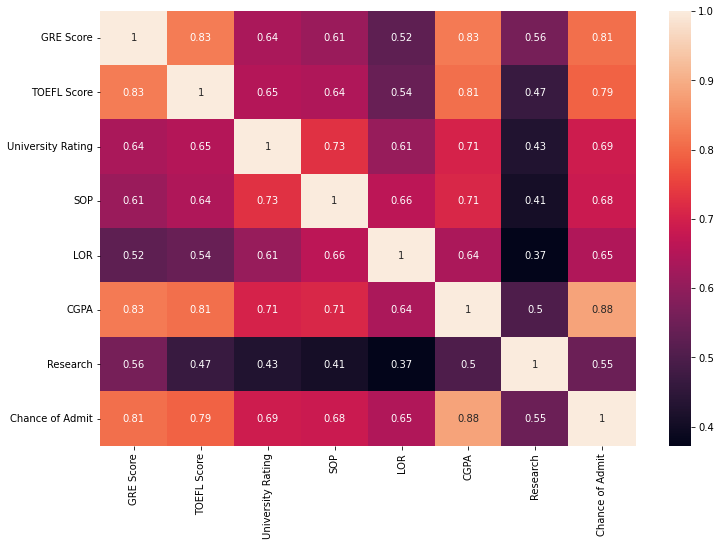

In [37]:
#plotting the correlation matrix as a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

As seen, there are direct proportions between "Chance of Admit" data and the other columns. In order to observe these direct proportions more clearly, we will visualize the data.

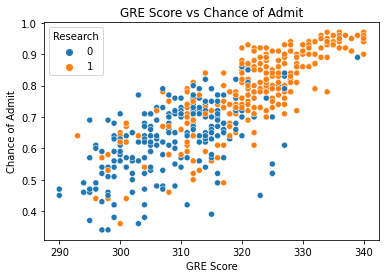

In [46]:
#plotting data which have high correlation
%matplotlib inline
import seaborn as sns
data=df
sns.scatterplot(data['GRE Score'], data['Chance of Admit'],data=df,hue=data['Research'])
plt.title("GRE Score vs Chance of Admit")
plt.show()

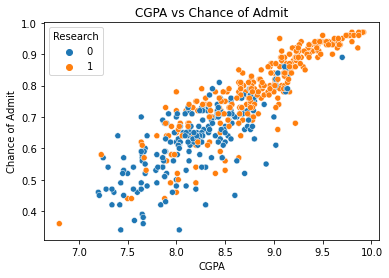

In [52]:
%matplotlib inline
import seaborn as sns
data =df
sns.scatterplot(data["CGPA"],data["Chance of Admit"],data=df,hue=data["Research"])
plt.title("CGPA vs Chance of Admit")
plt.show()

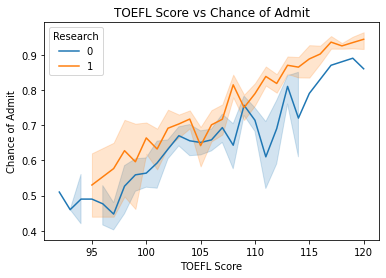

In [61]:
%matplotlib inline
import seaborn as sns
data=df
sns.lineplot(data["TOEFL Score"],data["Chance of Admit"],hue=data["Research"])
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

Using matplotlib backend: agg


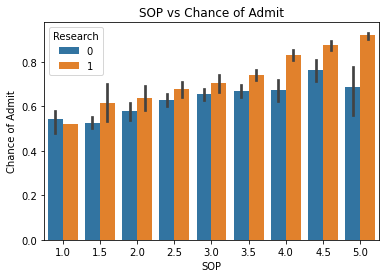

In [63]:
%matplotlib
import seaborn as sns
data=df
sns.barplot(data["SOP"],data["Chance of Admit"],hue=data["Research"])
plt.title("SOP vs Chance of Admit")
plt.show()

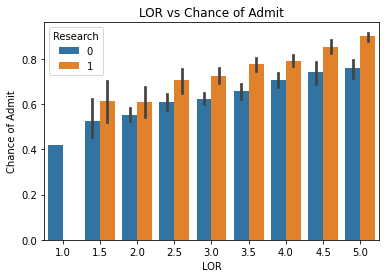

In [67]:
%matplotlib inline
import seaborn as sns
data=df
sns.barplot(data["LOR"],data["Chance of Admit"],hue=data["Research"])
plt.title("LOR vs Chance of Admit")
plt.show()

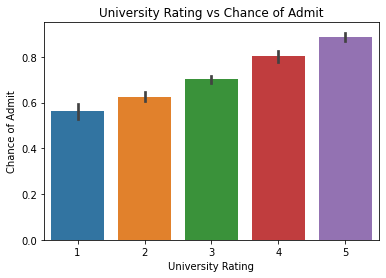

In [68]:
%matplotlib inline
import seaborn as sns
data=df
sns.barplot(data["University Rating"],data["Chance of Admit"])
plt.title("University Rating vs Chance of Admit")
plt.show()

It was said that there are direct proportions between the columns and "Chance of Admit" data. Also, when observing the graphs, there are linear relationships between them. Therefore, using Linear Regression method may be suitable on the data, but since "Chance of Admit" data depends on more than one varible, it is more appropriate to imply Multiple Linear Regression method instead of Linear Regression method.

## Importing the required libraries for regression analyzes

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


## Splitting the dataset into training and testing data

In [78]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA"]]
y = df["Chance of Admit"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Multiple Linear Regression



In [79]:
#impying multiple linear regression and determining its score
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.761


## Decision Tree Regression

In [80]:
#implying decision tree regression and determining its score
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.473


## Rondom Forest Regression

In [81]:
#implying random forest regression and determining its score
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.750


## Conclusion

R^2 score is an indicator of accuracy of regression models, and the accuracy is measured as close to 1 of this value .Therefore , as seen ,Multiple Linear Regression Models is brtter than Decision Tree Regression and Random Forest Regression on this dataset when comparing their R^2 scores